# Exploratory Data Analysis 

## import libraries 

In [350]:
import geopandas as gpd
import pandas as pd
from time import time
from keplergl import KeplerGl
from plotnine import *

# bug
- Montgomery park on the map shows only 2 points inside it but its count for that polygon is 5!!!

# function definitions

In [425]:
def add_species_metrics(species_gdf, parks_gdf):
    """
    Add total observation count and species richness metrics to each park in parks_gdf.
    
    Arguments
    ---------
    species_gdf (GeoDataFrame) : a dataframe of species occurrence data from GBIF. 
    parks_gdf  (GeoDataFrame)  : a dataframe of parks polygons. 
    
    Returns 
    -------
    GeoDataFrame
        Produces the parks_gdf with total observations and unique species counts for each park polygon. 
        
    Examples
    --------
    TODO 
    
    """
    parks = parks_gdf.copy()
    
    # initalize species counts 
    num_species = []
    
    # initialize species richness 
    species_richness = []
    
    for park in parks.geometry:
        
        # clip points to park
        clip = gpd.clip(species_gdf, mask=park)
        
        # check if species have been observed in park 
        if clip.notnull().sum()[0] == 0:
            num_species.append(0)
            species_richness.append(0)
            
        else:
            # add species count 
            count = len(clip)
            unique_species_count = clip.species.nunique()
            num_species.append(count)
            species_richness.append(unique_species_count)
                
    # add species count list to parks_gdf
    parks['species_count'] = num_species
    parks['species_richness'] = species_richness
    
    return parks

In [454]:
def plot_kepler(layers, names, config=None):
    """
    Produces a kepler plot with data specified in layers. 
    
    Arguments
    ---------
    layers (list): a list of geodataframes to add as kepler data in order of top to bottom layers.
    names (list) : a list of strings specifyig names of data layers in kepler. 
    config (dict) : A kepler config dictionary. 
    
    Returns 
    -------
    keplergl.keplergl.KeplerGl 
        A kepler plot with data layers. 
    """
    # intialize a base kepler plot 
    plot = KeplerGl(height=500)
    
    index = 0
    for layer in layers:
        # add data layer to kepler plot 
        plot.add_data(data=layer, name=names[index])
        
        # increment index 
        index += 1
        
    # check if a config is provided
    if config != None:
        plot.config = config
        
    return plot 

## GBIF EDA



## load data 


In [21]:
# load gbif 
gbif = gpd.read_file('../data/clean_data/vancouver_gbif.shp')

# load parks 
parks = gpd.read_file('../data/clean_data/vancouver_parks.shp')

In [3]:
gbif.head()

,kingdom,phylum,class,order,family,genus,species,latitude,longitude,timestamp,day,month,year,basis_of_r,geometry
0,Fungi,Basidiomycota,Dacrymycetes,Dacrymycetales,Dacrymycetaceae,Dacrymyces,Dacrymyces chrysospermus,49.305487,-123.138538,2015-02-08T13:15:50Z,8,2,2015,HUMAN_OBSERVATION,POINT (-123.13854 49.30549)
1,Animalia,Chordata,Aves,Anseriformes,Anatidae,Branta,Branta canadensis,49.279785,-123.138956,2015-02-08T16:28:30Z,8,2,2015,HUMAN_OBSERVATION,POINT (-123.13896 49.27978)
2,Animalia,Chordata,Aves,Anseriformes,Anatidae,Anas,Anas platyrhynchos,49.276400,-123.145512,2015-02-09T08:50:46Z,9,2,2015,HUMAN_OBSERVATION,POINT (-123.14551 49.27640)
3,Animalia,Chordata,Aves,Anseriformes,Anatidae,Lophodytes,Lophodytes cucullatus,49.279637,-123.139337,2015-02-09T08:42:00Z,9,2,2015,HUMAN_OBSERVATION,POINT (-123.13934 49.27964)
4,Animalia,Chordata,Aves,Passeriformes,Emberizidae,Melospiza,Melospiza melodia,49.285406,-123.143340,2015-02-09T09:51:57Z,9,2,2015,HUMAN_OBSERVATION,POINT (-123.14334 49.28541)


In [19]:
print("The count of total observations: {}.\n".format(gbif.shape[0]))
print("The years of observations span {0} to {1}.\n".format(gbif.year.min(), gbif.year.max()))
print("The count of unique months where observations are made: {}.\n".format(gbif.month.nunique()))

The count of total observations: 5110.

The years of observations span 2009 to 2019.

The count of unique months where observations are made: 12.



In [18]:
taxonomy = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
for level in taxonomy:
    print("The count of unique {0} represented is: {1}\n".format(level, gbif[level].nunique()))

The count of unique kingdom represented is: 5

The count of unique phylum represented is: 16

The count of unique class represented is: 43

The count of unique order represented is: 135

The count of unique family represented is: 350

The count of unique genus represented is: 672

The count of unique species represented is: 881



## visualize gbif species distribution 

In [202]:
plot = plot_kepler(layers=[gbif], names=['gbif'])
plot 

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'gbif': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21…

## get species observed in parks 

In order to capture species observations that occurr right along the border of parks, each park polygon will be buffered to 10m so that observations that are on or just outside the official park border are included. 

### buffer parks 

Will do this later when I find the correct CRS to re-project the GBIF data into. 

In [23]:
# clip the gbif data to inside parks 
clipped_gbif = gpd.clip(gdf=gbif, mask=parks)

In [24]:
print("The count of park observations: {}.\n".format(clipped_gbif.shape[0]))
print("The years of parks observations span {0} to {1}.\n".format(gbif.year.min(), clipped_gbif.year.max()))
print("The count of unique months where park observations are made: {}.\n".format(clipped_gbif.month.nunique()))

The count of park observations: 2638.

The years of parks observations span 2009 to 2019.

The count of unique months where park observations are made: 12.



In [25]:
taxonomy = ['kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
for level in taxonomy:
    print("The count of unique {0} represented is: {1}\n".format(level, clipped_gbif[level].nunique()))

The count of unique kingdom represented is: 5

The count of unique phylum represented is: 15

The count of unique class represented is: 37

The count of unique order represented is: 107

The count of unique family represented is: 244

The count of unique genus represented is: 429

The count of unique species represented is: 556



In [339]:
# proportion of gbif that is found in parks 
prop = round((len(clipped_gbif)/len(gbif))*100, 2)
print("Percentage of gbif obsevations that are found in parks: {} %.".format(prop))

Percentage of gbif obsevations that are found in parks: 51.62 %.


## visualize species in parks 

In [207]:
plot_kepler(layers=[clipped_gbif, parks], names=['clipped_gbif', 'parks'])

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'clipped_gbif': {'index': [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 13, 17, 18, 20, 22, 23, 24, 25, 2…

## Parks EDA


In [26]:
parks.head()

,park_name,park_type,park_prima,latitude,longitude,geometry
0,Locarno Park,Local,Park,49.274275,-123.207753,"MULTIPOLYGON (((-123.21241 49.27645, -123.2120..."
1,Macdonald Park,Local,Park,49.229759,-123.098392,"POLYGON ((-123.09928 49.23014, -123.09747 49.2..."
2,Maclean Park,Local,Park,49.278819,-123.088448,"POLYGON ((-123.08750 49.27845, -123.08757 49.2..."
3,Major Matthews Park,Local,Park,49.261583,-123.107233,"POLYGON ((-123.10744 49.26170, -123.10702 49.2..."
4,Malkin Park,Local,Park,49.231957,-123.176939,"POLYGON ((-123.17791 49.23119, -123.17791 49.2..."


In [32]:
print("The count of total parks: {}\n".format(parks.park_name.nunique()))
print("The count of unique park types: {}\n".format(parks.park_type.nunique()))
print("The count of unique primary park uses: {}\n".format(parks.park_prima.nunique()))

The count of total parks: 227

The count of unique park types: 2

The count of unique primary park uses: 9



In [35]:
for park_type in parks.park_type.unique():
    print(park_type)

Local
Regional


In [36]:
for use in parks.park_prima.unique():
    print(use)

Park
Green Space
Trail
Golf Course
Athletic
Playground
Plaza
Water Access
School Park


# determine gbif metrics

In [155]:
truncated_parks = parks.query('park_name == "Pacific Spirit Park" | park_name == "Stanley Park"')
truncated_parks

,park_name,park_type,park_prima,latitude,longitude,geometry
150,Stanley Park,Local,Park,49.302136,-123.140049,"POLYGON ((-123.13845 49.29360, -123.14156 49.2..."
225,Pacific Spirit Park,Regional,Park,49.251873,-123.195270,"POLYGON ((-123.19604 49.25463, -123.19604 49.2..."


In [171]:
num_species = []
for park in truncated_parks.geometry:
    start_time = time()
    
    # clip gbif points to a single park 
    park_species = gpd.clip(gdf=gbif, mask=park)
    
    stop_time = time()
    total = stop_time - start_time
    print("Clipping time for 1 park: {}".format(total))
    
    # store the number of species clipped for each park 
    num_species.append(len(park_species))
    

Clipping time for 1 park: 0.8060381412506104
Clipping time for 1 park: 0.3615880012512207


In [426]:
add_species_metrics(species_gdf=clipped_gbif, parks_gdf=truncated_parks)

,park_name,park_type,park_prima,latitude,longitude,geometry,species_count,species_richness
150,Stanley Park,Local,Park,49.302136,-123.140049,"POLYGON ((-123.13845 49.29360, -123.14156 49.2...",1422,336
225,Pacific Spirit Park,Regional,Park,49.251873,-123.195270,"POLYGON ((-123.19604 49.25463, -123.19604 49.2...",9,8


In [429]:
# add species metrics for all parks 
parks_counts_gdf = add_species_metrics(species_gdf=clipped_gbif, parks_gdf=parks)

In [432]:
parks_counts_gdf.head()

,park_name,park_type,park_prima,latitude,longitude,geometry,species_count,species_richness
0,Locarno Park,Local,Park,49.274275,-123.207753,"MULTIPOLYGON (((-123.21241 49.27645, -123.2120...",16,16
1,Macdonald Park,Local,Park,49.229759,-123.098392,"POLYGON ((-123.09928 49.23014, -123.09747 49.2...",0,0
2,Maclean Park,Local,Park,49.278819,-123.088448,"POLYGON ((-123.08750 49.27845, -123.08757 49.2...",0,0
3,Major Matthews Park,Local,Park,49.261583,-123.107233,"POLYGON ((-123.10744 49.26170, -123.10702 49.2...",0,0
4,Malkin Park,Local,Park,49.231957,-123.176939,"POLYGON ((-123.17791 49.23119, -123.17791 49.2...",0,0


**Note**
The sum `species_counts` is a bit higher than the actual count of `clipped_gbif` because a 3 points are being double counted because of the overlap between `Pacific Spirit` multipolygon and `Pacific Spirit Park` polygon. 


In [338]:
parks_counts_gdf.species_count.sum()

2641

In [340]:
len(clipped_gbif)

2638

# Visualize
Stanely Park is clearly an outlier in terms of `species_counts` as well as `Pacific Spirit`. So much so that it drowns out the distribution of the other parks. It makes parks with a count of zero and a count of 100 look the same even though there is clearly a difference. It makes sense to visualize the map with Stanley Park and Pacific Spirit as a seperate layer so that the distribution of `species_counts` for the rest of the parks excluding these two is clearly visible. 

#### config

In [452]:
config={
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "g76c2i",
          "type": "point",
          "config": {
            "dataId": "species",
            "label": "Point",
            "color": [
              71,
              211,
              217
            ],
            "columns": {
              "lat": "latitude",
              "lng": "longitude",
              "altitude": None
            },
            "isVisible": False,
            "visConfig": {
              "radius": 4,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        },
        {
          "id": "knderf",
          "type": "geojson",
          "config": {
            "dataId": "species",
            "label": "species",
            "color": [
              231,
              159,
              213
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": False,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.8,
              "thickness": 0.5,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": False,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        },
        {
          "id": "fezuq1",
          "type": "point",
          "config": {
            "dataId": "park_outliers",
            "label": "Point",
            "color": [
              30,
              150,
              190
            ],
            "columns": {
              "lat": "latitude",
              "lng": "longitude",
              "altitude": None
            },
            "isVisible": False,
            "visConfig": {
              "radius": 10,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        },
        {
          "id": "sgqhcdq",
          "type": "geojson",
          "config": {
            "dataId": "park_outliers",
            "label": "park_outliers",
            "color": [
              137,
              218,
              193
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": False,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.8,
              "thickness": 0.5,
              "strokeColor": [
                179,
                173,
                158
              ],
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": False,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "species_richness",
              "type": "integer"
            },
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": {
              "name": "species_richness",
              "type": "integer"
            },
            "strokeColorScale": "quantize",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        },
        {
          "id": "01y7lyr",
          "type": "point",
          "config": {
            "dataId": "parks",
            "label": "Point",
            "color": [
              18,
              147,
              154
            ],
            "columns": {
              "lat": "latitude",
              "lng": "longitude",
              "altitude": None
            },
            "isVisible": False,
            "visConfig": {
              "radius": 10,
              "fixedRadius": False,
              "opacity": 0.8,
              "outline": False,
              "thickness": 2,
              "strokeColor": None,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "filled": True
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear"
          }
        },
        {
          "id": "aevc459",
          "type": "geojson",
          "config": {
            "dataId": "parks",
            "label": "parks",
            "color": [
              221,
              178,
              124
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.8,
              "thickness": 0.5,
              "strokeColor": [
                136,
                87,
                44
              ],
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": False,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": {
              "name": "species_count",
              "type": "integer"
            },
            "colorScale": "quantize",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "species": [
              "kingdom",
              "phylum",
              "class",
              "order",
              "family"
            ],
            "park_outliers": [
              "park_name",
              "park_type",
              "park_prima",
              "species_count",
              "species_richness"
            ],
            "parks": [
              "park_name",
              "park_type",
              "park_prima",
              "species_count",
              "species_richness"
            ]
          },
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": 49.23834975753327,
      "longitude": -123.14224073994116,
      "pitch": 0,
      "zoom": 10.09468222457594,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

#### kepler

In [438]:
park_outliers = parks_counts_gdf.query('park_name == "Stanley Park" | park_name == "Pacific Spirit"')
parks_counts_gdf_no_outliers = parks_counts_gdf.drop(labels=park_outliers.index)

In [456]:
plot = plot_kepler(layers=[clipped_gbif, park_outliers, 
                           parks_counts_gdf_no_outliers],
                   names=['species', 'park_outliers','parks'],
                   config=config)
plot

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'g76c2i', 'type': '…

In [457]:
plot.save_to_html(file_name='../kepler_html/gbif_and_parks.html')

Map saved to ../kepler_html/gbif_and_parks.html!


In [344]:
# Question 1: How many species observations are made inside parks vs outside?
obseved_in_park = len(clipped_gbif)
outside_park = len(gbif) - obseved_in_park
species_in_out = {'observed_in_park':['yes', 'no'],
                  'count':[obseved_in_park, outside_park]}
species_in_out_df = pd.DataFrame(species_in_out)
species_in_out_df

,observed_in_park,count
0,yes,2638
1,no,2472


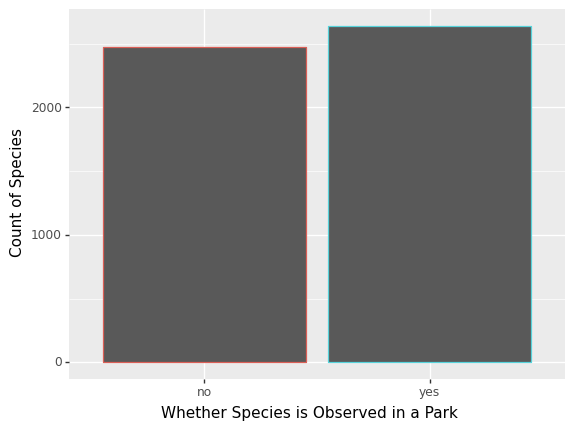

<ggplot: (295140443)>

In [371]:
# comparison of species found within and outside a park 
(ggplot(species_in_out_df) + 
    aes(x='observed_in_park', y='count', color='observed_in_park') + 
    geom_col() + 
    labs(x='Whether Species is Observed in a Park',
        y='Count of Species') + 
    scale_color_discrete(guide=False))

In [442]:
# Question 2: What are the top 10 parks with the highest observations?
top_ten_species_count_no_outliers = parks_counts_gdf_no_outliers.sort_values(by='species_count', ascending=False).head(10)
top_ten_species_count_no_outliers

,park_name,park_type,park_prima,latitude,longitude,geometry,species_count,species_richness
20,McCleery Golf Course,Local,Golf Course,49.219646,-123.168184,"POLYGON ((-123.16816 49.22126, -123.16817 49.2...",129,97
187,Jericho Beach Park,Local,Park,49.272203,-123.197039,"MULTIPOLYGON (((-123.20159 49.27607, -123.2013...",91,54
111,Queen Elizabeth Park,Local,Park,49.240959,-123.111792,"POLYGON ((-123.11809 49.24222, -123.11807 49.2...",83,59
180,Hastings Park,Local,Park,49.282835,-123.037673,"MULTIPOLYGON (((-123.03329 49.28126, -123.0343...",65,54
138,English Bay Beach Park,Local,Park,49.284017,-123.141642,"POLYGON ((-123.14619 49.28998, -123.14573 49.2...",59,27
208,Vandusen Botanical Gardens Park,Local,Park,49.239446,-123.132689,"POLYGON ((-123.12800 49.24093, -123.12802 49.2...",51,31
118,Devonian Harbour Park,Local,Park,49.294152,-123.134430,"POLYGON ((-123.13496 49.29398, -123.13497 49.2...",50,34
72,Musqueam Park,Local,Park,49.230430,-123.192096,"POLYGON ((-123.19671 49.23461, -123.19389 49.2...",43,42
139,Everett Crowley Park,Local,Park,49.210672,-123.036418,"POLYGON ((-123.03363 49.20853, -123.03650 49.2...",34,32
188,John Hendry (Trout Lake) Park,Local,Park,49.255662,-123.062099,"POLYGON ((-123.05907 49.25685, -123.05908 49.2...",27,17


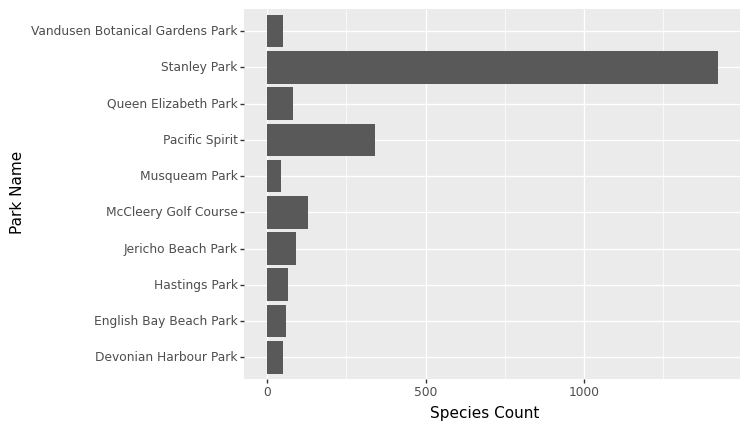

<ggplot: (312489069)>

In [443]:
top_ten_obs_count = parks_counts_gdf.sort_values(by='species_count', ascending=False).head(10)
(ggplot(top_ten_obs_count) + 
    aes(x='park_name', y='species_count') + 
    geom_col() + 
    labs(x='Park Name',
         y='Species Count') +
    coord_flip())

In [450]:
# Question 3: which parks have the most species richness?

top_ten_species_richness = parks_counts_gdf_no_outliers.sort_values(by='species_richness', ascending=False).head(10)
top_ten_species_richness

,park_name,park_type,park_prima,latitude,longitude,geometry,species_count,species_richness
20,McCleery Golf Course,Local,Golf Course,49.219646,-123.168184,"POLYGON ((-123.16816 49.22126, -123.16817 49.2...",129,97
111,Queen Elizabeth Park,Local,Park,49.240959,-123.111792,"POLYGON ((-123.11809 49.24222, -123.11807 49.2...",83,59
187,Jericho Beach Park,Local,Park,49.272203,-123.197039,"MULTIPOLYGON (((-123.20159 49.27607, -123.2013...",91,54
180,Hastings Park,Local,Park,49.282835,-123.037673,"MULTIPOLYGON (((-123.03329 49.28126, -123.0343...",65,54
72,Musqueam Park,Local,Park,49.230430,-123.192096,"POLYGON ((-123.19671 49.23461, -123.19389 49.2...",43,42
118,Devonian Harbour Park,Local,Park,49.294152,-123.134430,"POLYGON ((-123.13496 49.29398, -123.13497 49.2...",50,34
139,Everett Crowley Park,Local,Park,49.210672,-123.036418,"POLYGON ((-123.03363 49.20853, -123.03650 49.2...",34,32
208,Vandusen Botanical Gardens Park,Local,Park,49.239446,-123.132689,"POLYGON ((-123.12800 49.24093, -123.12802 49.2...",51,31
138,English Bay Beach Park,Local,Park,49.284017,-123.141642,"POLYGON ((-123.14619 49.28998, -123.14573 49.2...",59,27
223,Point Grey Golf and Country Club (Private),Local,Golf Course,49.224051,-123.185021,"POLYGON ((-123.19119 49.22084, -123.19108 49.2...",26,21


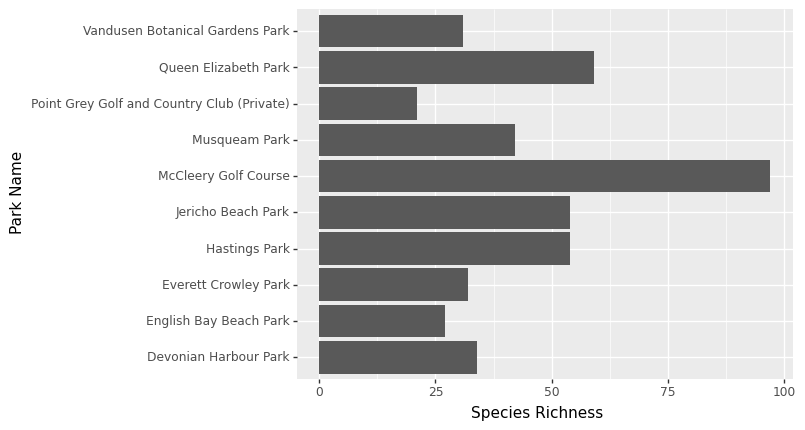

<ggplot: (312123805)>

In [451]:
(ggplot(top_ten_species_richness) + 
    aes(x='park_name', y='species_richness') + 
    geom_col() + 
    labs(x='Park Name',
         y='Species Richness') +
    coord_flip())

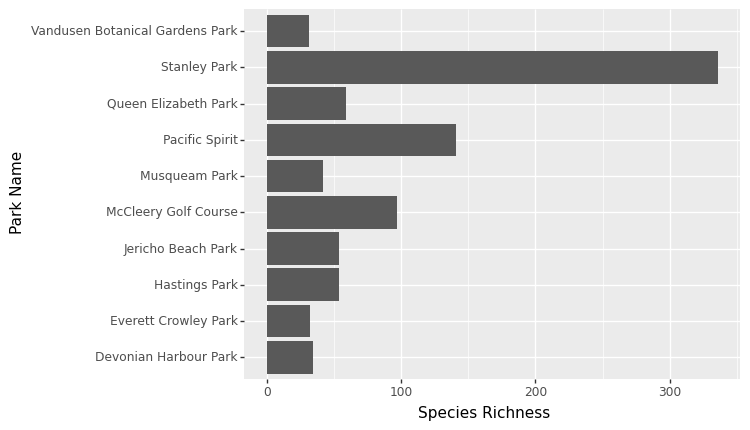

<ggplot: (309067635)>

In [446]:
(ggplot(top_ten_species_richness) + 
    aes(x='park_name', y='species_richness') + 
    geom_col() + 
    labs(x='Park Name',
         y='Species Richness') +
    coord_flip())

In [437]:
top_ten_species_count_no_outliers

,park_name,park_type,park_prima,latitude,longitude,geometry,species_count
20,McCleery Golf Course,Local,Golf Course,49.219646,-123.168184,"POLYGON ((-123.16816 49.22126, -123.16817 49.2...",129
187,Jericho Beach Park,Local,Park,49.272203,-123.197039,"MULTIPOLYGON (((-123.20159 49.27607, -123.2013...",91
111,Queen Elizabeth Park,Local,Park,49.240959,-123.111792,"POLYGON ((-123.11809 49.24222, -123.11807 49.2...",83
180,Hastings Park,Local,Park,49.282835,-123.037673,"MULTIPOLYGON (((-123.03329 49.28126, -123.0343...",65
138,English Bay Beach Park,Local,Park,49.284017,-123.141642,"POLYGON ((-123.14619 49.28998, -123.14573 49.2...",59
208,Vandusen Botanical Gardens Park,Local,Park,49.239446,-123.132689,"POLYGON ((-123.12800 49.24093, -123.12802 49.2...",51
118,Devonian Harbour Park,Local,Park,49.294152,-123.134430,"POLYGON ((-123.13496 49.29398, -123.13497 49.2...",50
72,Musqueam Park,Local,Park,49.230430,-123.192096,"POLYGON ((-123.19671 49.23461, -123.19389 49.2...",43
139,Everett Crowley Park,Local,Park,49.210672,-123.036418,"POLYGON ((-123.03363 49.20853, -123.03650 49.2...",34
188,John Hendry (Trout Lake) Park,Local,Park,49.255662,-123.062099,"POLYGON ((-123.05907 49.25685, -123.05908 49.2...",27
